# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_TIME, 'es_ES')

'es_ES'

In [2]:
df = pd.read_csv('Datos+Meteorológicos_Arg_2023.csv')
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%d/%m/%Y')
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,2023-12-31,Buenos Aires,15,12,0.0,17.9,49.2
1821,2023-12-31,Cordoba,15,7,0.0,17.8,62.4
1822,2023-12-31,Rosario,14,8,0.0,38.2,31.2
1823,2023-12-31,Mendoza,13,9,84.8,27.6,35.3


In [5]:
ciudades = []
for c in df['Ciudad']:
    if c not in ciudades:
        ciudades.append(c)

ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [6]:
meses = []
for m in df['Fecha']:
    if datetime.datetime.strftime(m, '%B') not in meses:
        meses.append(datetime.datetime.strftime(m, '%B'))
meses

['enero',
 'febrero',
 'marzo',
 'abril',
 'mayo',
 'junio',
 'julio',
 'agosto',
 'septiembre',
 'octubre',
 'noviembre',
 'diciembre']

In [7]:
print('Ingrese una ciudad: ')
for c in ciudades:
    print(f'{ciudades.index(c)}: {c}')
ciudad = ciudades[int(input('Ingrese el numero de ciudad: '))]

Ingrese una ciudad: 
0: Buenos Aires
1: Cordoba
2: Rosario
3: Mendoza
4: Tucuman


In [8]:
print('Ingrese un mes (numero): ')
for m in meses:
    print(f'{meses.index(m) + 1}: {m}')
mes = int(input('Ingrese el numero de mes: '))

Ingrese un mes (numero): 
1: enero
2: febrero
3: marzo
4: abril
5: mayo
6: junio
7: julio
8: agosto
9: septiembre
10: octubre
11: noviembre
12: diciembre


In [9]:
print(ciudad)
print(mes)

Rosario
4


In [10]:
filtro_ciudad = df['Ciudad'] == ciudad
filtro_ciudad

0       False
1       False
2        True
3       False
4       False
        ...  
1820    False
1821    False
1822     True
1823    False
1824    False
Name: Ciudad, Length: 1825, dtype: bool

In [11]:
df_ciudad_filtro = df.loc[filtro_ciudad]
df_ciudad_filtro

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
7,2023-01-02,Rosario,23,17,0.0,16.3,37.7
12,2023-01-03,Rosario,29,15,0.0,18.5,37.2
17,2023-01-04,Rosario,25,22,0.0,27.8,64.3
22,2023-01-05,Rosario,29,22,0.0,27.2,69.2
...,...,...,...,...,...,...,...
1802,2023-12-27,Rosario,24,17,0.0,26.1,46.1
1807,2023-12-28,Rosario,24,8,0.0,25.3,89.4
1812,2023-12-29,Rosario,19,9,49.5,16.0,82.8
1817,2023-12-30,Rosario,16,13,0.0,16.0,60.5


In [12]:
filtro_fecha = pd.DatetimeIndex(df_ciudad_filtro['Fecha']).month == mes
filtro_fecha

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [13]:
df_ciudad_fecha_filtro = df_ciudad_filtro.loc[filtro_fecha]
df_ciudad_fecha_filtro

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
452,2023-04-01,Rosario,14,10,0.0,27.8,66.7
457,2023-04-02,Rosario,19,13,0.0,37.1,47.2
462,2023-04-03,Rosario,21,12,0.0,33.1,49.7
467,2023-04-04,Rosario,24,10,117.6,18.0,87.8
472,2023-04-05,Rosario,12,9,14.6,40.0,46.2
477,2023-04-06,Rosario,18,10,0.0,18.2,81.7
482,2023-04-07,Rosario,12,10,0.0,23.1,52.4
487,2023-04-08,Rosario,23,11,0.0,26.9,49.1
492,2023-04-09,Rosario,19,9,0.0,36.0,50.3
497,2023-04-10,Rosario,15,11,0.0,25.1,31.5


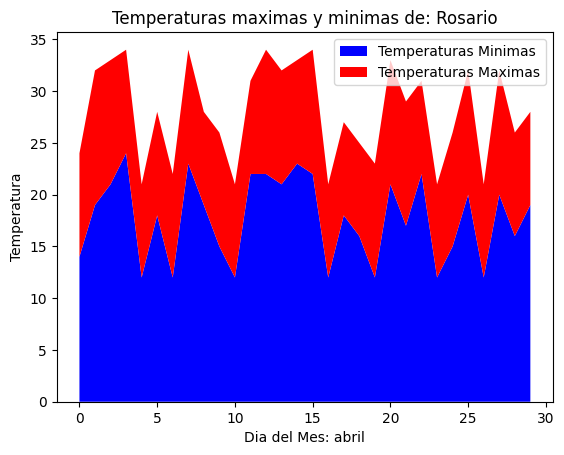

In [29]:
tmax = df_ciudad_fecha_filtro['Temperatura Maxima'].to_list()
tmin = df_ciudad_fecha_filtro['Temperatura Minima'].to_list()

temps = np.vstack([tmax, tmin])

fig, ax = plt.subplots()
ax.stackplot(np.arange(0, len(tmax)), temps, labels=['Temperaturas Minimas', 'Temperaturas Maximas'], colors=['b', 'r'])
ax.set_title(f"Temperaturas maximas y minimas de: {ciudad}")
ax.set_xlabel(f'Dia del Mes: {meses[mes-1]}')
ax.set_ylabel('Temperatura')
ax.legend(loc='upper right');